📂 Loading data from: /Users/info/Desktop/FlightDelay_ML_project/data/preprocessed_flight_data.csv
✅ Data loaded successfully!
X shape: (6965266, 12)
y shape: (6965266,)
Target distribution:
 is_arr_delayed
False    0.637916
True     0.362084
Name: proportion, dtype: float64

✅ All categorical features encoded successfully!

🌲 Random Forest model trained successfully!


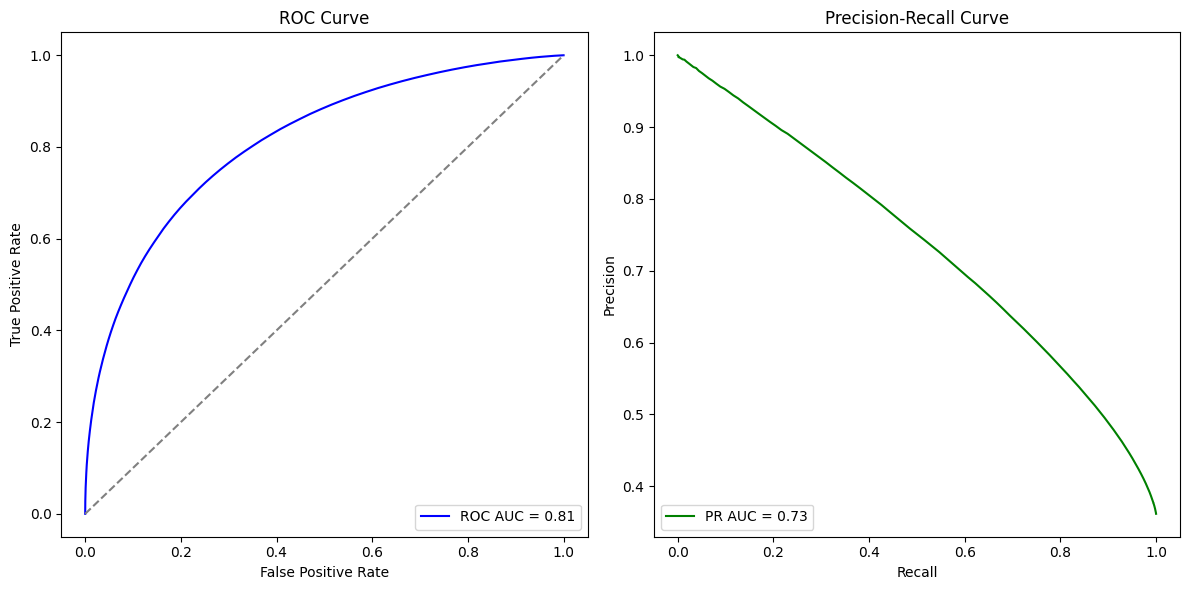


=== Random Forest Evaluation ===
Accuracy: 0.7610
ROC AUC: 0.8129
PR AUC: 0.7348


In [1]:
# === Random Forest Classification (by Salma) ===

from load_data import load_preprocessed_data
from evaluation import evaluate_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# 1. Load data
X, y = load_preprocessed_data()
print("✅ Data loaded successfully!")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Target distribution:\n", y.value_counts(normalize=True))

# 2. Encode categorical columns
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

print("\n✅ All categorical features encoded successfully!")

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,        # number of trees
    max_depth=None,          # no depth limit
    random_state=42,
    n_jobs=-1                # use all CPU cores for speed
)

rf_model.fit(X_train, y_train)
print("\n🌲 Random Forest model trained successfully!")

# 5. Evaluate model
metrics = evaluate_model(rf_model, X_test, y_test)

# 6. Display results
print("\n=== Random Forest Evaluation ===")
print(f"Accuracy: {metrics['accuracy']:.4f}")
print(f"ROC AUC: {metrics['roc_auc']:.4f}")
print(f"PR AUC: {metrics['pr_auc']:.4f}")


Accuracy (76%) → A strong improvement over Naive Bayes (65%)
ROC AUC (0.81) → Excellent discriminative ability
PR AUC (0.73) → Handles class imbalance very well